In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('bank-additional.csv')

In [3]:
data

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"30;""blue-collar"";""married"";""basic.9y"";""no"";""ye..."
1,"39;""services"";""single"";""high.school"";""no"";""no""..."
2,"25;""services"";""married"";""high.school"";""no"";""ye..."
3,"38;""services"";""married"";""basic.9y"";""no"";""unkno..."
4,"47;""admin."";""married"";""university.degree"";""no""..."
...,...
4114,"30;""admin."";""married"";""basic.6y"";""no"";""yes"";""y..."
4115,"39;""admin."";""married"";""high.school"";""no"";""yes""..."
4116,"27;""student"";""single"";""high.school"";""no"";""no"";..."
4117,"58;""admin."";""married"";""high.school"";""no"";""no"";..."


In [4]:
data = pd.read_csv('bank-additional.csv',sep=';')

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [7]:
data = pd.get_dummies(data, drop_first=True)


In [8]:
X = data.drop('y', axis=1)
y = data['y']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1020   85]
 [  60   71]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1105
           1       0.46      0.54      0.49       131

    accuracy                           0.88      1236
   macro avg       0.70      0.73      0.71      1236
weighted avg       0.89      0.88      0.89      1236



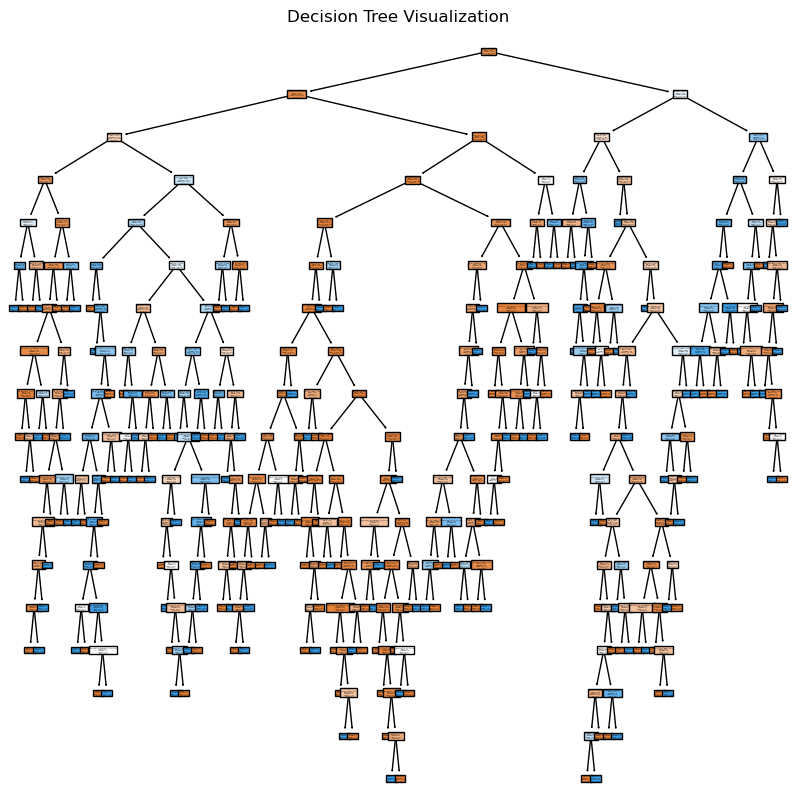

In [14]:
plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualization')
plt.show()